# Data Analytics - ML25M 

### Imports

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed)
random.seed(seed)

## Data Acquisition

movies.csv contains the following fields:

* movieId - a unique identifier for each movie.
* title - the title of the movie.
* genres - a pipe-separated list of genres for the movie.

It will be used to get the movie title and the genres.

In [2]:
movies_df = pd.read_csv('./ml-25m/movies.csv')
genres = movies_df['genres'].str.get_dummies(sep='|')
movies_df = pd.concat([movies_df, genres], axis=1)
movies_genres = movies_df.copy()
movies_genres.drop('genres', axis=1, inplace=True)


movies_df.drop('genres', axis=1, inplace=True)
movies_df.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


genome-scores.csv contains the following fields:

* movieId - a unique identifier for each movie.
* tagId - a unique identifier for each tag.
* relevance - a score from 0.0 to 1.0 representing the relevance of the tag to the movie.

Combined with the tags.csv file, this will be used to assign tags and their relevance to each movie.

In [3]:
scores_df = pd.read_csv('./ml-25m/genome-scores.csv')
tags_df = pd.read_csv('./ml-25m/genome-tags.csv')
ratings_df = pd.read_csv('./ml-25m/ratings.csv')

df = movies_df.merge(scores_df, on='movieId')
df = df.merge(tags_df, on='tagId')
df = df.pivot_table(index=['movieId', 'title'], columns='tag', values='relevance', fill_value=0).reset_index().rename_axis(None, axis=1)

# average rating for each movie
ratings_df = ratings_df.groupby(['movieId'])['rating'].mean().reset_index()
df = ratings_df.merge(df, on='movieId')

movies_genres = movies_genres.merge(ratings_df, on='movieId')
movies_genres.drop('movieId', axis=1, inplace=True)

# movieId and title are not needed for the model
movies = df.copy()
df.drop(['movieId', 'title'], axis=1, inplace=True)

In [4]:
df.to_csv('./dataset.csv', index=False)

## Data visualization

In [5]:
print(f'Number of samples: {df.shape[0]}')
df.describe()

Number of samples: 13816


,rating,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
count,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,...,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000
mean,3.272180,0.046596,0.044771,0.078292,0.085599,0.129250,0.088348,0.074092,0.180610,0.096887,...,0.117631,0.043644,0.048769,0.062500,0.245069,0.097053,0.041831,0.042961,0.125901,0.031766
std,0.484078,0.071478,0.062601,0.111595,0.086021,0.146648,0.105167,0.100385,0.140021,0.134208,...,0.136072,0.083196,0.146318,0.083094,0.122572,0.089406,0.074281,0.135702,0.104373,0.084668
min,0.899038,0.007000,0.007250,0.006000,0.010000,0.017250,0.004250,0.004500,0.015250,0.002250,...,0.009250,0.004000,0.002500,0.003500,0.039750,0.006750,0.005250,0.001500,0.034750,0.007750
25%,2.986574,0.025750,0.026750,0.028750,0.037250,0.053250,0.029500,0.024500,0.079750,0.024750,...,0.052000,0.017250,0.011000,0.022500,0.160250,0.042000,0.021500,0.008500,0.081500,0.016500
50%,3.340420,0.033750,0.034750,0.042000,0.056000,0.078250,0.052750,0.041500,0.137750,0.047750,...,0.072250,0.022500,0.015250,0.039750,0.216500,0.069000,0.028000,0.012250,0.097500,0.019000
75%,3.629630,0.045312,0.047250,0.079500,0.102250,0.136000,0.101500,0.078750,0.235750,0.107250,...,0.118250,0.034000,0.024000,0.074000,0.296250,0.119000,0.038312,0.020000,0.126000,0.023500
max,4.483096,0.999750,1.000000,0.997750,0.922000,0.988000,0.920000,0.913500,0.925500,0.987000,...,0.999250,0.981000,0.999000,0.992750,0.972500,0.974750,1.000000,0.995250,0.992250,0.994250


In [6]:
# mean, median, and standard deviation of ratings
print("Mode: ", df['rating'].mode())
print('Median: {:.2f}'.format(df['rating'].median()))
print('Std: {:.2f}'.format(df['rating'].std()))

Mode:  0    3.5
Name: rating, dtype: float64
Median: 3.34
Std: 0.48


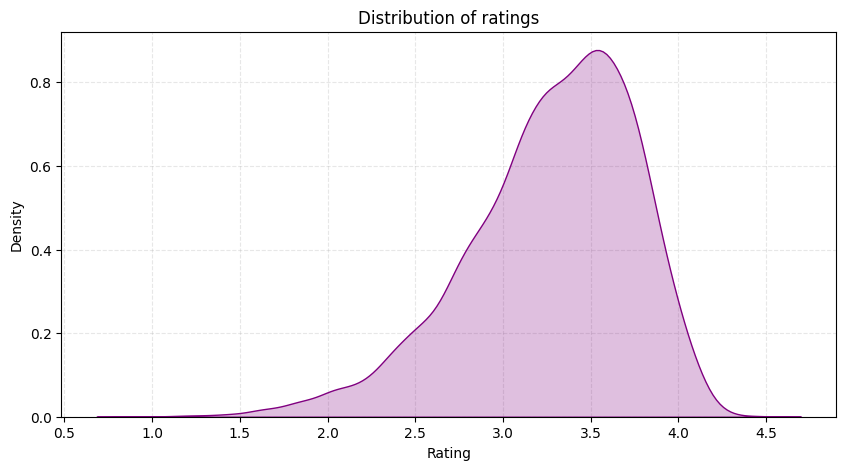

In [7]:
# density plot of ratings
plt.figure(figsize=(10, 5))
sns.kdeplot(df['rating'], shade=True, color='purple', zorder=2)
plt.grid(True, zorder=1, linestyle='--', alpha=0.3)
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

In [8]:
N_LABELS = df.rating.nunique()
print(f'Number of labels: {N_LABELS}')

# looking for missing values and duplicates
print("Nan: ", df.isna().sum().sum())
print("Duplicates: ", df.duplicated().sum())

Number of labels: 12002
Nan:  0
Duplicates:  0


mu: 3.27, sigma: 0.48, variance: 0.23
stat=0.057, p=0.000
Probably different distributions


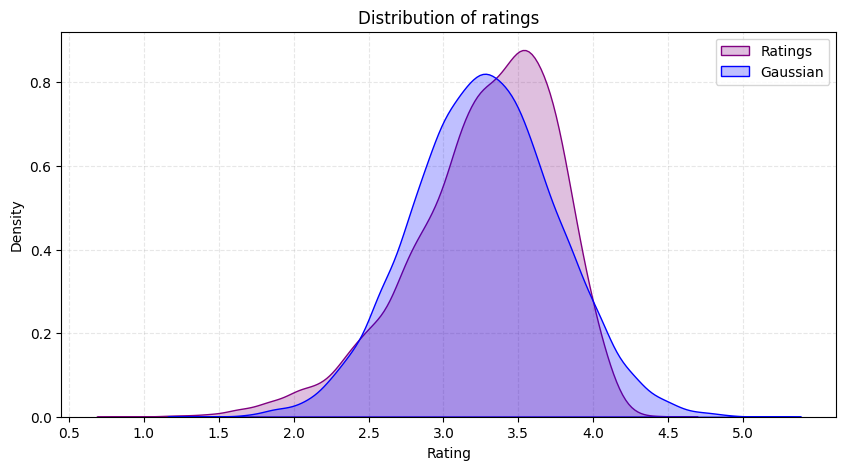

In [9]:
# compare rating distribution with gaussian distribution
# Kolmogorov-Smirnov test,
# H0: the two distributions are the same
# H1: the two distributions are different
from scipy.stats import kstest
from scipy.stats import norm

# mean and standard deviation of ratings
mu = df['rating'].mean()
sigma = df['rating'].std()
variance = sigma**2

print(f'mu: {mu:.2f}, sigma: {sigma:.2f}, variance: {variance:.2f}')

# random samples from a normal distribution
samples = np.random.normal(mu, sigma, df.shape[0])

stat, p = kstest(df['rating'], 'norm', args=(mu, sigma))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

# plot the two distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(df['rating'], shade=True, color='purple', zorder=2, label='ratings')
sns.kdeplot(samples, shade=True, color='blue', zorder=2, label='gaussian')
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.grid(True, zorder=1, linestyle='--', alpha=0.3)
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.legend(['Ratings', 'Gaussian'])
plt.show()

In [10]:
# distance from normal distribution
# mean absolute error
mae = np.abs(df['rating'] - samples).mean()

# mean squared error
mse = np.square(df['rating'] - samples).mean()

# root mean squared error
rmse = np.sqrt(mse)

print(f'MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}')

MAE: 0.54, MSE: 0.47, RMSE: 0.68


In [11]:
# Kullback-Leibler divergence
# H0: the two distributions are the same
# H1: the two distributions are different
from scipy.stats import entropy

# calculate KL divergence
kl = entropy(df['rating'], samples)

print(f'KL: {kl:.2f}')

KL: 0.02


## Correlation between genres and ratings

/var/folders/b3/wwdp9x6d2_3fvz33_v4d_k_80000gn/T/ipykernel_40834/2091473739.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = movies_genres.corr()


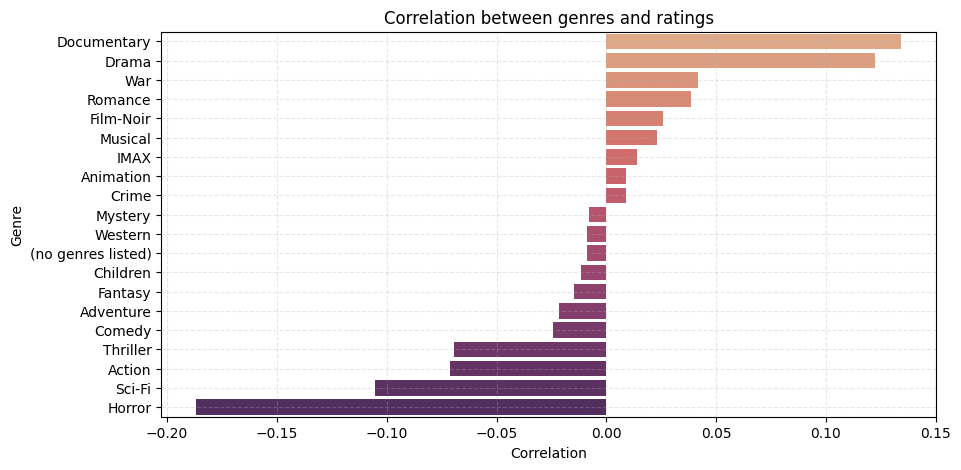

In [12]:
# calculate the correlation between genres and ratings
corr = movies_genres.corr()
corr = corr['rating'].sort_values(ascending=False)
corr = corr[1:]

# plot the correlation
plt.figure(figsize=(10, 5))
sns.barplot(x=corr.values, y=corr.index, palette='flare')
plt.grid(True, zorder=1, linestyle='--', alpha=0.3)
plt.title('Correlation between genres and ratings')
plt.xlabel('Correlation')
plt.ylabel('Genre')
plt.show()

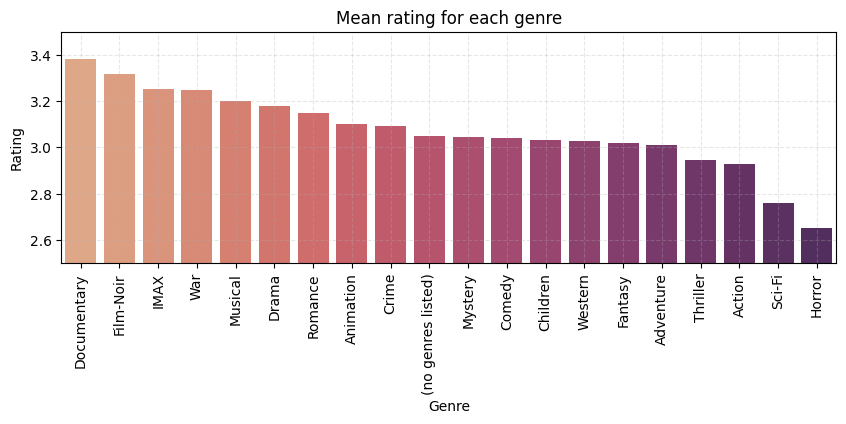

In [13]:
# mean rating for each genre
genres = movies_genres.columns[1:]
genres_rating = pd.DataFrame(columns=['genre', 'rating'])
for genre in genres:
    rating = movies_genres[movies_genres[genre] == 1]['rating'].mean()
    genres_rating = pd.concat([genres_rating, pd.DataFrame([[genre, rating]], columns=['genre', 'rating'])])

genres_rating = genres_rating[genres_rating['genre'] != 'rating']

# order the genres by rating
genres_rating = genres_rating.sort_values(by='rating', ascending=False)

# plot the mean rating for each genre
plt.figure(figsize=(10, 3))
sns.barplot(x='genre', y='rating', data=genres_rating, palette='flare')
plt.xticks(rotation=90)
plt.grid(True, zorder=1, linestyle='--', alpha=0.3)
plt.ylim(2.5, 3.5)
plt.title('Mean rating for each genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

## Correlation between tags and ratings

In [14]:
# features correlation
corr = df.corr()
corr = corr['rating'].sort_values(ascending=False)
corr = corr.drop('rating')

/var/folders/b3/wwdp9x6d2_3fvz33_v4d_k_80000gn/T/ipykernel_40834/1227878551.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


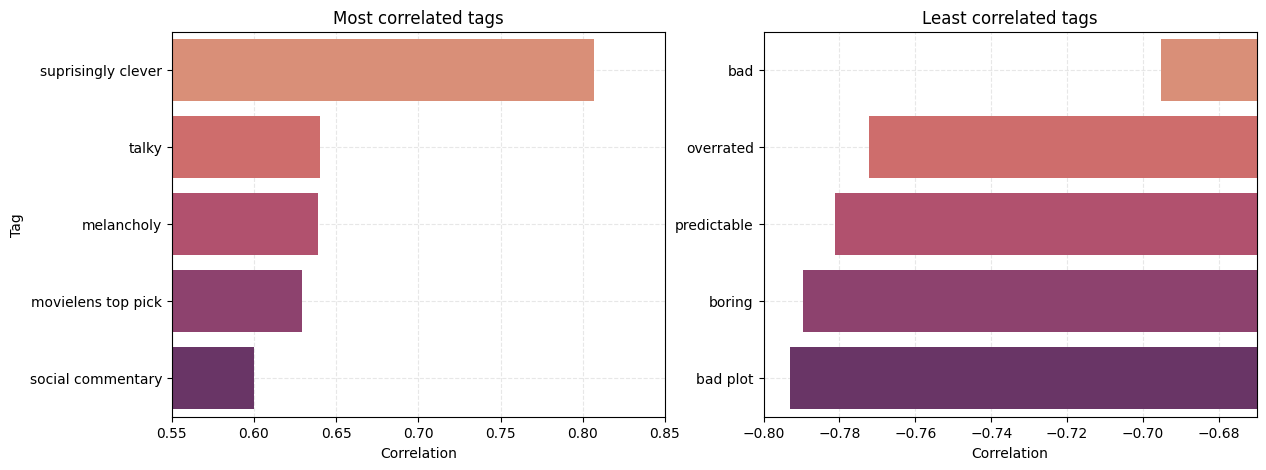

In [15]:
plt.subplots(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=corr.values[:5], y=corr.index[:5], palette='flare', zorder=2)
plt.grid(True, zorder=-1, linestyle='--', alpha=0.3)
plt.title('Most correlated tags')
plt.xlabel('Correlation')
plt.ylabel('Tag')
plt.xlim(0.55, 0.85)

plt.subplot(1, 2, 2)
sns.barplot(x=corr.values[-5:], y=corr.index[-5:], palette='flare', zorder=2)
plt.grid(True, zorder=-1, linestyle='--', alpha=0.3)
plt.title('Least correlated tags')
plt.xlabel('Correlation')
plt.xlim(-.8, -0.67)
plt.ylabel('')
plt.show()


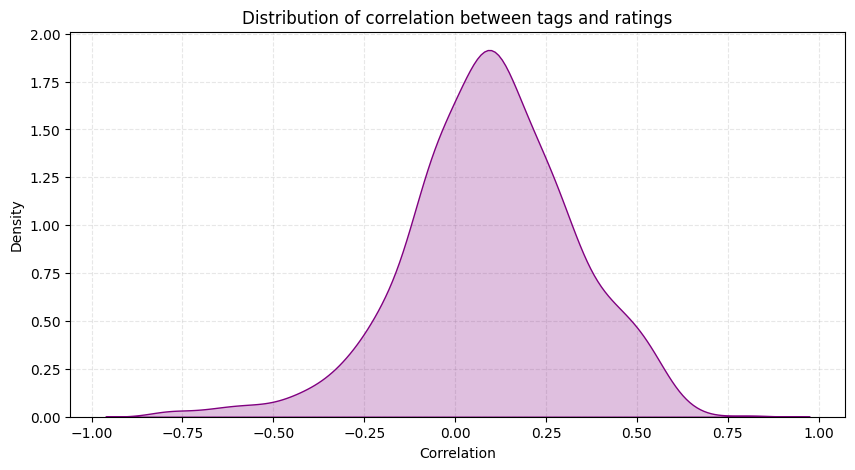

Number of tags with correlation > 0.25: 272
Number of tags with correlation < -0.25: 72


In [16]:
# plot the correlation distribution
plt.figure(figsize=(10, 5))
sns.kdeplot(corr.values, shade=True, color='purple', zorder=2)
plt.grid(True, zorder=1, linestyle='--', alpha=0.3)
plt.title('Distribution of correlation between tags and ratings')
plt.xlabel('Correlation')
plt.ylabel('Density')
plt.show()

# number of tags with correlation > 0.25 or < -0.25
print(f'Number of tags with correlation > 0.25: {corr[corr > 0.25].shape[0]}')
print(f'Number of tags with correlation < -0.25: {corr[corr < -0.25].shape[0]}')

# Feature Importance

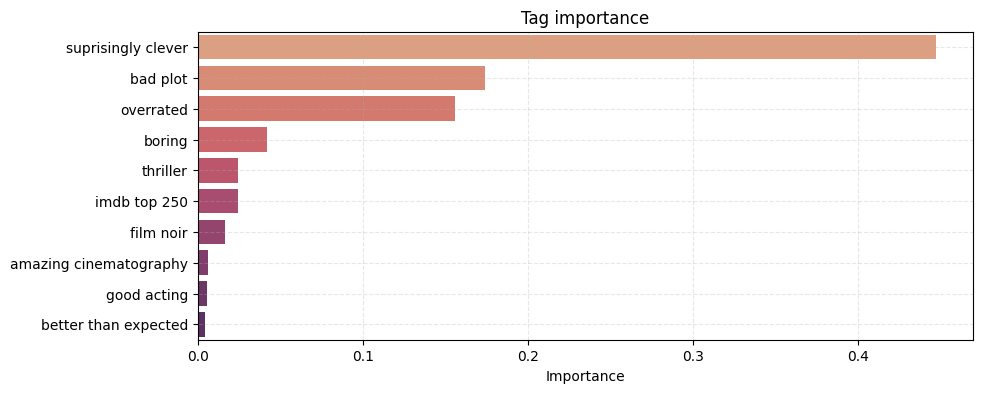

In [137]:
# random forest importance
from sklearn.ensemble import RandomForestRegressor

X = df.drop('rating', axis=1)
y = df['rating']

rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X, y)

importance = rf.feature_importances_

# sort the features by importance
indices = np.argsort(importance)[::-1]
features = X.columns[indices]
indices = indices[:10]
features = features[:10]

plt.figure(figsize=(10, 4))
sns.barplot(x=importance[indices], y=features, palette='flare')
plt.grid(True, zorder=1, linestyle='--', alpha=0.3)
plt.title('Tag importance')
plt.xlabel('Importance')

plt.show()

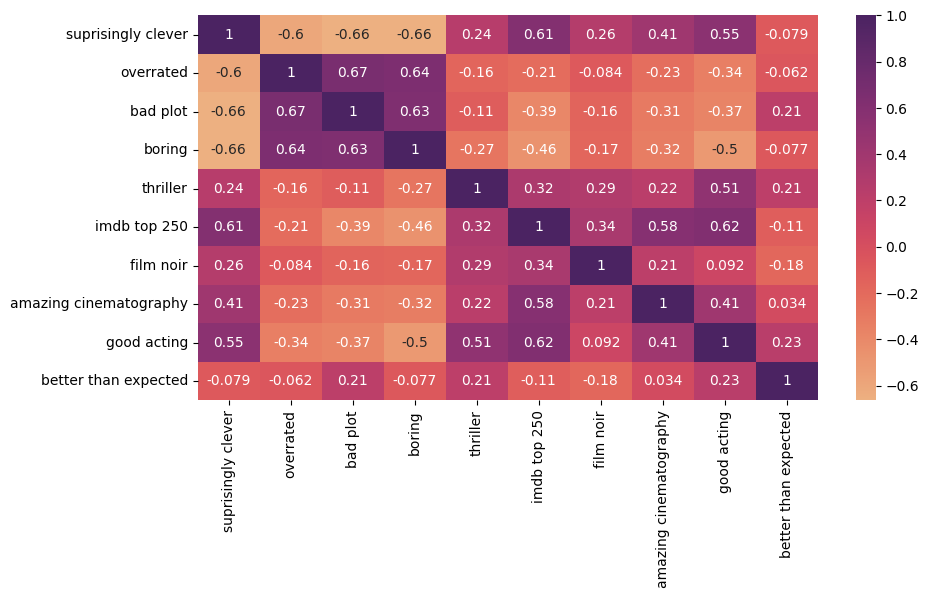

In [136]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[features].corr(), annot=True, cmap='flare')
plt.title('Correlation between most important tags')
plt.show()

In [132]:
# Similarity between movies
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(movies.drop(['movieId', 'title'], axis=1))

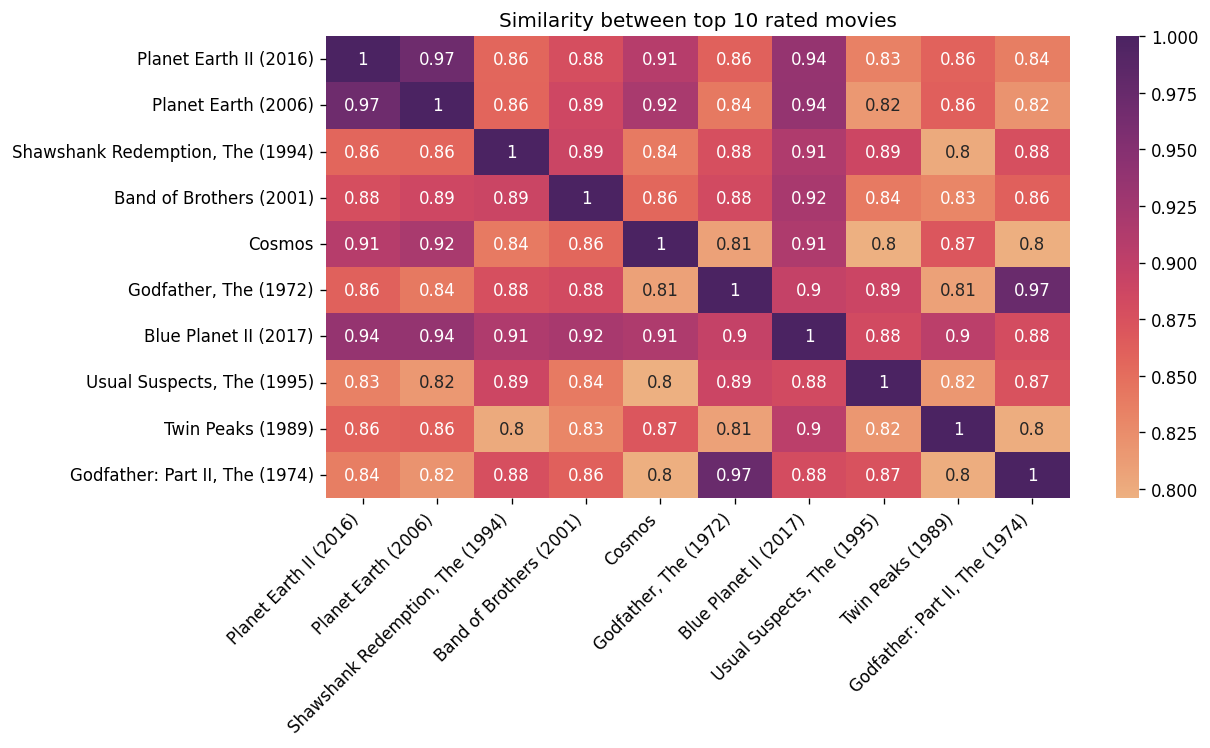

In [133]:
top10 = movies.sort_values(by='rating', ascending=False).head(10).index
top10_similarity = similarity[top10, :][:, top10]

# heatmap with movie titles
plt.figure(figsize=(10, 5), dpi=120)
sns.heatmap(top10_similarity, annot=True, cmap='flare', xticklabels=movies['title'].iloc[top10], yticklabels=movies['title'].iloc[top10])
plt.title('Similarity between top 10 rated movies') 
plt.xticks(rotation=45, ha='right')
plt.show()

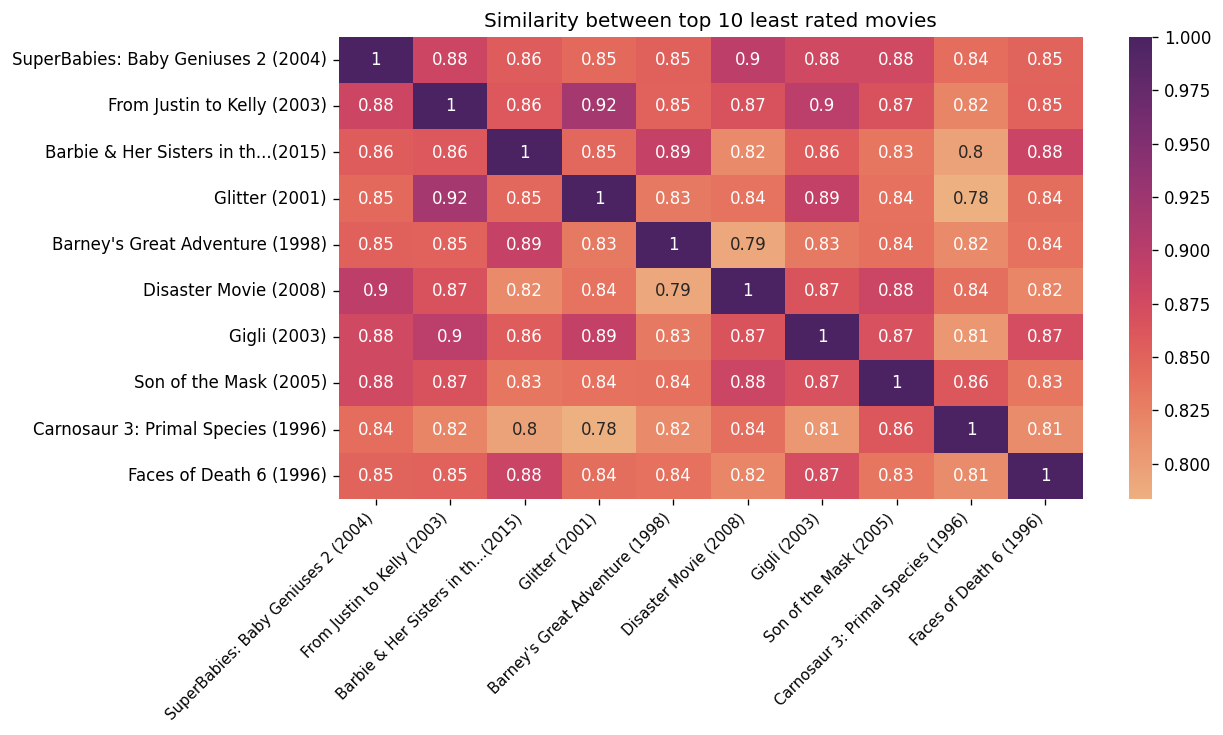

In [135]:
flop10 = movies.sort_values(by='rating').head(10).index
flop10_similarity = similarity[flop10, :][:, flop10]


plt.figure(figsize=(10, 5), dpi=120)
sns.heatmap(flop10_similarity, annot=True, cmap='flare', xticklabels=movies['title'].iloc[flop10], yticklabels=movies['title'].iloc[flop10])
plt.title('Similarity between top 10 least rated movies')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.show()

## 2D Representation of the dataset

In [20]:
df_random = df.copy().sample(n=5000, random_state=42)
X = df_random.drop('rating', axis=1)
Y = df_random['rating']

In [21]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
X = pca.fit_transform(X)

# tsne 
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=1, perplexity=120, n_iter=1000, verbose=1)
X = tsne.fit_transform(X)

[t-SNE] Computing 361 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.003s...
[t-SNE] Computed neighbors for 5000 samples in 0.483s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.300143
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.185059
[t-SNE] KL divergence after 1000 iterations: 1.778052


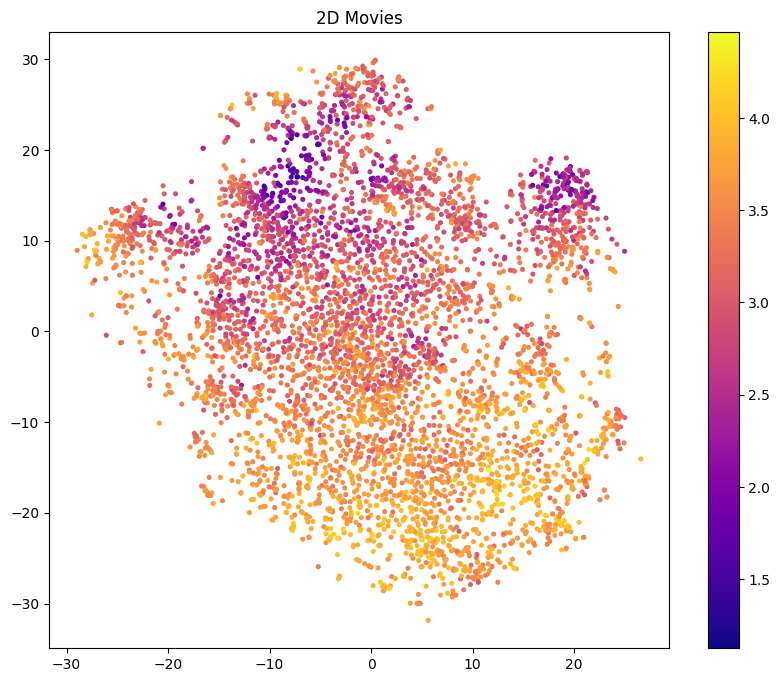

In [33]:
# plot
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma',s=7)
plt.title('2D Movies')
plt.colorbar()
plt.show()